In [2]:
import matplotlib.pyplot as plt
import matplotlib

In [3]:
import sys
sys.path.append('../')

In [27]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np

In [29]:
%aimport log_plotter

In [30]:
from log_plotter import get_run_names_events, get_data_pth_events
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
plt.rcParams.update({'font.size': 16})

In [31]:
patterns = ['.*runs_mnist_bsgd/mheat_.*krum.*']
tags = ['Vloss', 'loss', 'Vacc', 'krum/select']
logdir = '/h/iman/Code/dist-quantization/runs'
tb_files = get_run_names_events(logdir, patterns)
log_data_krum, _ = get_data_pth_events(logdir, tb_files, tags)

In [10]:
def savefig(file_name):
    plt.savefig('%s.pdf' % (file_name),
                dpi=100, bbox_inches='tight')

In [11]:
def calc_avg(data):
    grad = 0.0
    # find the common set of 
    min_len = min([len(val[1]) for _, val in data.items()])
    for key, val in data.items():
        grad += val[1][:min_len]
    return grad / len(data)

In [12]:
def calc_total_avg(data):
    # calculate average for every key
    avg_data = {}
    for key, val in data.items():
        avg_data[key] = calc_avg(val)
    return avg_data

In [24]:
def plot_loss(data, tags, file_name):
    plt.grid()
    for i, datum in enumerate(data):
        plt.plot(datum, label=tags[i])
    plt.legend()
#     plt.title('Krum vs FedAvg without Byzantine')
    plt.ylabel('Training Loss')
    plt.xlabel('Iterations')
    savefig(file_name)
    plt.show()

In [25]:
def plot_vloss(data, tags, file_name):
    plt.grid()
    for i, datum in enumerate(data):
        plt.plot(datum, label=tags[i])
    plt.legend()
#     plt.title('')
    plt.ylabel('Validation Accuracy')
    plt.xlabel('(x10) Epochs')
    savefig(file_name)
    plt.show()

In [15]:
def plot_krum_sel(data, file_name):
    plt.hist(data, np.arange(0, 10, 1))
    plt.title('Krum Client Selection')
    plt.ylabel('Frequency')
    plt.xlabel('Client Number')
    plt.yscale('log')

    savefig(file_name)

    plt.show()

In [22]:
log_data_bu

{'Vloss': {'6': array([[ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
           6.        ,  7.        ,  8.        ,  9.        , 10.        ,
          11.        , 12.        , 13.        , 14.        , 15.        ,
          16.        , 17.        , 18.        , 19.        , 20.        ,
          21.        , 22.        , 23.        , 24.        , 25.        ,
          26.        , 27.        , 28.        , 29.        , 30.        ,
          31.        , 32.        , 33.        , 34.        , 35.        ,
          36.        , 37.        , 38.        , 39.        , 40.        ,
          41.        , 42.        , 43.        , 44.        , 45.        ,
          46.        , 47.        ],
         [ 2.30627513,  9.31483746, 10.27592945, 10.84786701, 11.22907352,
          11.55696869, 11.82469177, 12.06575203, 12.26798439, 12.44996738,
          12.60657787, 12.74357796, 12.87831116, 13.00362301, 13.09904671,
          13.19974232, 13.2976923 , 13.3928566 , 

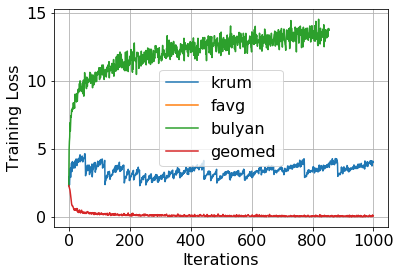

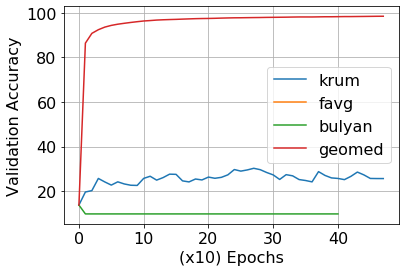

In [26]:
data = [calc_total_avg(datum) for datum in [log_data_krum, log_data_fa, log_data_bu, log_data_geo]]
plot_loss([i['loss'] for i in data], ['krum', 'favg', 'bulyan', 'geomed'], 'loss-krum')
plot_vloss([i['Vacc'] for i in data], ['krum', 'favg', 'bulyan', 'geomed'], 'vacc-krum')

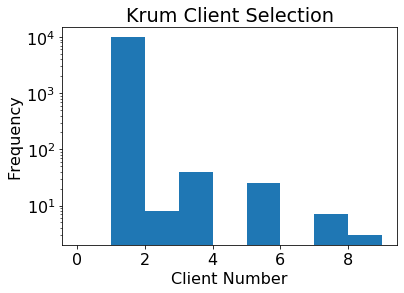

In [63]:
plot_krum_sel(log_data_krum['krum/select']['0'][1], 'krum-selection')